In [1]:
# importing required libraries
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np

# EDA And Data Visualization

In [2]:
dtime = pd.read_csv("D:/Data Science/Assignments/simple linear regression/delivery_time.csv")

In [3]:
dtime

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
dtime.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [5]:
dtime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [6]:
dtime.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


C:\Users\parth\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

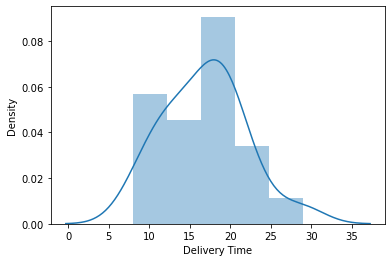

In [7]:
sns.distplot(dtime['Delivery Time'])

C:\Users\parth\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

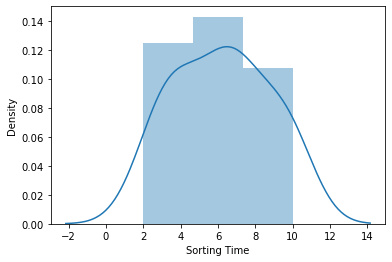

In [8]:
sns.distplot(dtime['Sorting Time'])

# Feature Engineering

In [9]:
d_time_rename = dtime.rename(columns = {"Delivery Time":"delivery_time", "Sorting Time":"sorting_time"}, inplace = False)

In [10]:
model = smf.ols("delivery_time~sorting_time", data=d_time_rename).fit()

<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

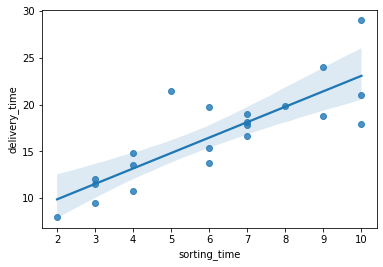

In [11]:
sns.regplot(x="sorting_time", y="delivery_time", data=d_time_rename)

# Model Testing

In [12]:
#co-efficients
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [13]:
# t-values
print(model.tvalues)

Intercept       3.823349
sorting_time    6.387447
dtype: float64


In [14]:
# p-values
print(model.pvalues)

Intercept       0.001147
sorting_time    0.000004
dtype: float64


In [15]:
# R squared values
(model.rsquared, model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

# Model Prediction

In [16]:
pred_time = pd.Series([11,18])
pred_time

0    11
1    18
dtype: int64

In [17]:
time_pred=pd.DataFrame(pred_time ,columns=['sorting_time'])
time_pred

,sorting_time
0,11
1,18


In [18]:
model.predict(time_pred)

0    24.721953
1    36.265092
dtype: float64

# Using Sweet Viz

In [19]:
# !pip install sweetviz

In [20]:
# importing sweetviz
import sweetviz as sv

In [21]:
#analyzing the dataset
advert_report = sv.analyze(d_time_rename)

                                             |          | [  0%]   00:00 -> (? left)

In [22]:
#display the report
advert_report.show_html('Advertising.html')

Report Advertising.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Using Log Transformation

In [23]:
# Defining X and Y i.e. dependent and independent variable

X = np.log(dtime['Sorting Time'])
y = dtime['Delivery Time']

In [24]:
new_data = pd.concat([y,X], axis = 1)

In [25]:
new_data.head()

,Delivery Time,Sorting Time
0,21.00,2.302585
1,13.50,1.386294
2,19.75,1.791759
3,24.00,2.197225
4,29.00,2.302585


In [26]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     float64
dtypes: float64(2)
memory usage: 464.0 bytes


In [27]:
new_data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,1.728470
std,5.074901,0.467979
min,8.000000,0.693147
25%,13.500000,1.386294
50%,17.830000,1.791759
75%,19.750000,2.079442
max,29.000000,2.302585


In [28]:
new_data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.833933
Sorting Time,0.833933,1.000000


C:\Users\parth\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

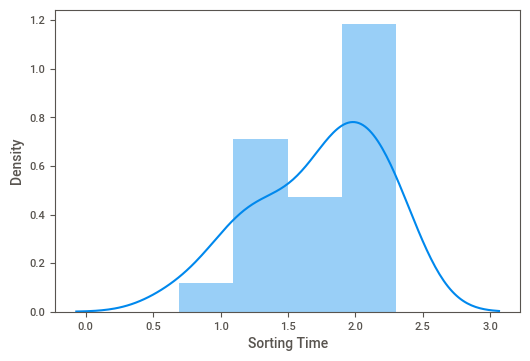

In [29]:
sns.distplot(new_data['Sorting Time'])

C:\Users\parth\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

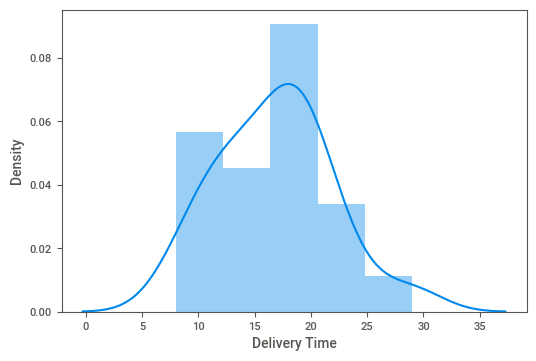

In [30]:
sns.distplot(new_data['Delivery Time'])

# Feature Engineering

In [33]:
newdata_rename = new_data.rename(columns = {"Delivery Time":"delivery_time", "Sorting Time":"sorting_time"}, inplace = False)

In [34]:
model = smf.ols("delivery_time~sorting_time", data = newdata_rename).fit()

<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

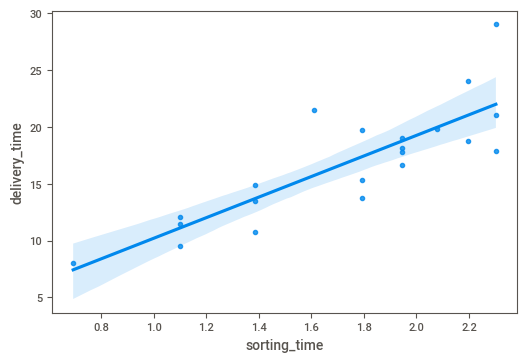

In [36]:
sns.regplot(x="sorting_time", y="delivery_time", data = newdata_rename)

# Model Testing

In [37]:
#co-efficients
model.params

Intercept       1.159684
sorting_time    9.043413
dtype: float64

In [38]:
# t-values
print(model.tvalues)

Intercept       0.472460
sorting_time    6.586789
dtype: float64


In [39]:
# p-values
print(model.pvalues)

Intercept       0.641980
sorting_time    0.000003
dtype: float64


In [40]:
# R squared values
(model.rsquared, model.rsquared_adj)

(0.6954434611324223, 0.6794141696130761)

# Model Prediction

In [41]:
pred_time = pd.Series([11,18])
pred_time

0    11
1    18
dtype: int64

In [42]:
time_pred=pd.DataFrame(pred_time ,columns=['sorting_time'])
time_pred

,sorting_time
0,11
1,18


In [43]:
model.predict(time_pred)

0    100.637232
1    163.941126
dtype: float64

# Using Boxcox Transformation

In [44]:
from scipy.stats import boxcox

In [49]:
x,y = boxcox(dtime['Sorting Time'])
X = pd.Series(x, dtype = float,name = 'Sorting Time')
y = dtime['Delivery Time']

In [51]:
boco_data = pd.concat([y,X], axis=1)

In [52]:
boco_data.head()

,Delivery Time,Sorting Time
0,21.00,5.719365
1,13.50,2.338756
2,19.75,3.573250
3,24.00,5.211954
4,29.00,5.719365


In [53]:
boco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     float64
dtypes: float64(2)
memory usage: 464.0 bytes


In [54]:
boco_data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,3.590371
std,5.074901,1.498477
min,8.000000,0.891671
25%,13.500000,2.338756
50%,17.830000,3.573250
75%,19.750000,4.687218
max,29.000000,5.719365


In [55]:
boco_data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.831788
Sorting Time,0.831788,1.000000


C:\Users\parth\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

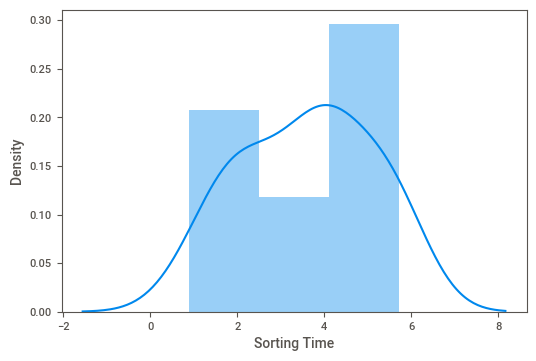

In [58]:
sns.distplot(boco_data['Sorting Time'])

C:\Users\parth\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

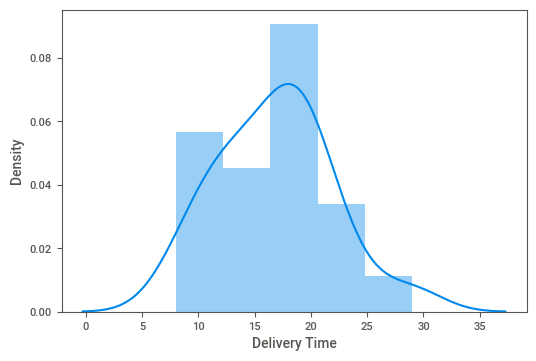

In [59]:
sns.distplot(boco_data['Delivery Time'])

# Feature Engineering

In [60]:
newdata_rename = boco_data.rename(columns = {"Delivery Time":"delivery_time", "Sorting Time":"sorting_time"}, inplace = False)

In [61]:
model = smf.ols("delivery_time~sorting_time", data = newdata_rename).fit()

<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

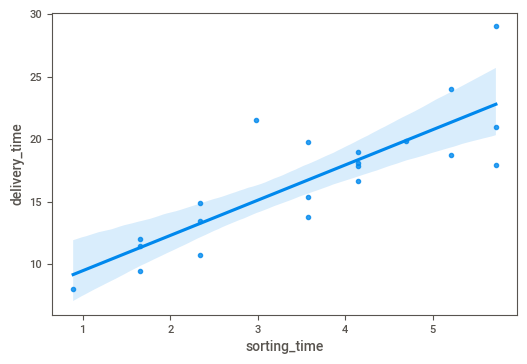

In [63]:
sns.regplot(x="sorting_time", y="delivery_time", data = newdata_rename)

# Model Testing

In [64]:
#co-efficients
model.params

Intercept       6.676804
sorting_time    2.817020
dtype: float64

In [65]:
# t-values
print(model.tvalues)

Intercept       3.993304
sorting_time    6.531646
dtype: float64


In [66]:
# p-values
print(model.pvalues)

Intercept       0.000778
sorting_time    0.000003
dtype: float64


In [67]:
# R squared values
(model.rsquared, model.rsquared_adj)

(0.6918705972941136, 0.6756532603095933)

# Model Prediction

In [68]:
pred_time = pd.Series([11,18])
pred_time

0    11
1    18
dtype: int64

In [69]:
time_pred=pd.DataFrame(pred_time ,columns=['sorting_time'])
time_pred

,sorting_time
0,11
1,18


In [70]:
model.predict(time_pred)

0    37.664029
1    57.383172
dtype: float64

# Using SQRT Transformation

In [71]:
# Defining X and Y i.e. dependent and independent variable

X = np.sqrt(dtime['Sorting Time'])
y = dtime['Delivery Time']

In [72]:
data_sqrt = pd.concat([y,X], axis = 1)

In [73]:
data_sqrt.head()

,Delivery Time,Sorting Time
0,21.00,3.162278
1,13.50,2.000000
2,19.75,2.449490
3,24.00,3.000000
4,29.00,3.162278


In [74]:
data_sqrt.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,2.433008
std,5.074901,0.533381
min,8.000000,1.414214
25%,13.500000,2.000000
50%,17.830000,2.449490
75%,19.750000,2.828427
max,29.000000,3.162278


In [75]:
data_sqrt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     float64
dtypes: float64(2)
memory usage: 464.0 bytes


In [76]:
data_sqrt.corr()

,Delivery Time,Sorting Time
Delivery Time,1.00000,0.83415
Sorting Time,0.83415,1.00000


C:\Users\parth\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

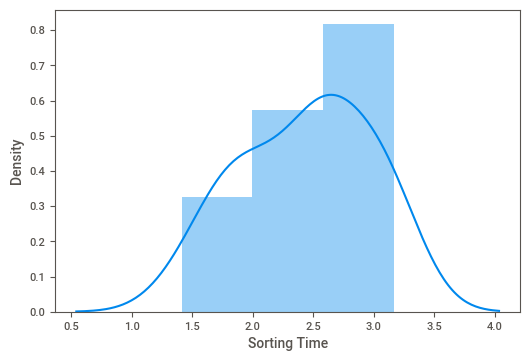

In [78]:
sns.distplot(data_sqrt['Sorting Time'])

C:\Users\parth\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

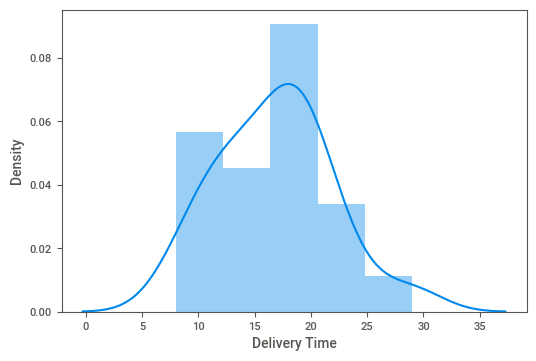

In [79]:
sns.distplot(data_sqrt['Delivery Time'])

# Feature Engineering

In [81]:
newdata_rename = data_sqrt.rename(columns = {"Delivery Time":"delivery_time", "Sorting Time":"sorting_time"}, inplace = False)

In [82]:
model = smf.ols("delivery_time~sorting_time", data = newdata_rename).fit()

<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

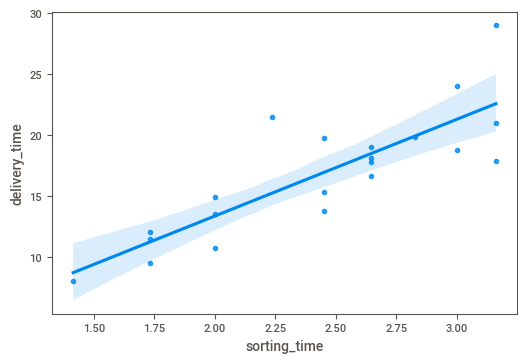

In [83]:
sns.regplot(x="sorting_time", y="delivery_time", data = newdata_rename)

# Model Testing

In [84]:
#co-efficients
model.params

Intercept      -2.518837
sorting_time    7.936591
dtype: float64

In [85]:
# t-values
print(model.tvalues)

Intercept      -0.840911
sorting_time    6.592434
dtype: float64


In [86]:
# p-values
print(model.pvalues)

Intercept       0.410857
sorting_time    0.000003
dtype: float64


In [87]:
# R squared values
(model.rsquared, model.rsquared_adj)

(0.6958062276308671, 0.6797960290851233)

# Model Prediction

In [88]:
pred_time = pd.Series([11,18])
pred_time

0    11
1    18
dtype: int64

In [89]:
time_pred=pd.DataFrame(pred_time ,columns=['sorting_time'])
time_pred

,sorting_time
0,11
1,18


In [90]:
model.predict(time_pred)

0     84.783662
1    140.339797
dtype: float64